# **Second week examples** - Cayetano Soneira

## Importance sampling (weighted events)

In [1]:
options(repr.plot.width=4,repr.plot.height=4)

Simulated: 0.15841 0.02293 0.00153 0 0 
Real: 0.1586553 0.02275013 0.001349898 3.167124e-05 2.866516e-07 
Relative error 0.0002452539 0.0001798681 0.000180102 3.167124e-05 2.866516e-07 


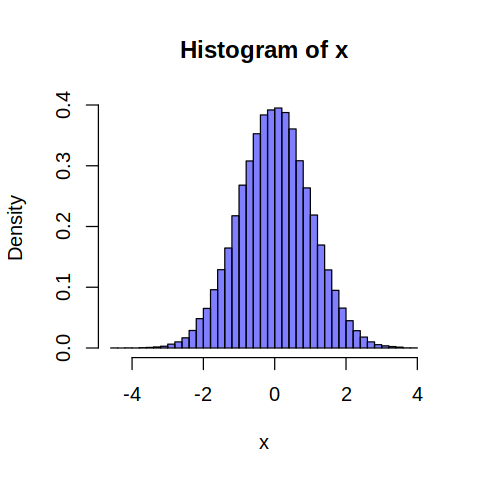

In [2]:
# Generate a sample and count how many of them are bigger than 
N <- 1e5
x <- rnorm(N,0,1)

# We want to estimate the famous 5-sigmas: this is the probability of obtaining
# values above the values in the vector given.
b <- pnorm(c(1,2,3,4,5),0,1,lower.tail=FALSE)

# Logical vector summing; TRUEs are 1s
a <- c(sum(x>1)/N, sum(x>2)/N, sum(x>3)/N ,sum(x>4)/N ,sum(x>5)/N)

cat("Simulated:",a,"\n")
cat("Real:",b,"\n")
cat("Relative error",abs(a-b),"\n")
# CONCLUSION. We need the order of 10**7 random numbers in the sample just to obtain some
# values in the simulation on the 5-sigma region, which is totally unefficient.
hist(x,breaks=50,freq=FALSE,col=rgb(0,0,1,1/2))

Simulated: 0.1677623 0.009927081 0.0002376173 2.108785e-06 6.463241e-09 
Real: 0.1586553 0.02275013 0.001349898 3.167124e-05 2.866516e-07 
Relative error 0.009107069 0.01282305 0.001112281 2.956246e-05 2.801883e-07 


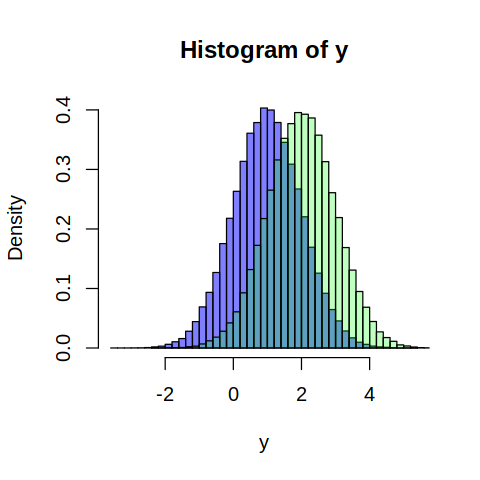

In [3]:
y <-rnorm(N,1,1)
# Now we want to generate more numbers in the 2-sigma
w <- dnorm(y,0,1)/dnorm(y,2,1)

# Also: sum(ifelse(y>1,w,0))
a <- c(sum(w[y>1])/N, sum(w[y>2])/N, sum(w[y>3])/N ,sum(w[y>4])/N ,sum(w[y>5])/N)
b <- pnorm(c(1,2,3,4,5),0,1,lower.tail=FALSE)
cat("Simulated:",a,"\n")
cat("Real:",b,"\n")
cat("Relative error",abs(a-b),"\n")
# Very poor results in the lower sigmas because we are biasing the sample to
# have more numbers in the upper tail.
hist(y,breaks=50,freq=FALSE,col=rgb(0,0,1,1/2))
hist(rnorm(N,2,1), add=TRUE,breaks=50,freq=FALSE,col=rgb(0,1,0,1/4))

Simulated: 137.6235 0.4760995 0.0006466602 3.208136e-07 3.690502e-11 
Real: 0.1586553 0.02275013 0.001349898 3.167124e-05 2.866516e-07 
Relative error 137.4648 0.4533493 0.0007032378 3.135043e-05 2.866147e-07 


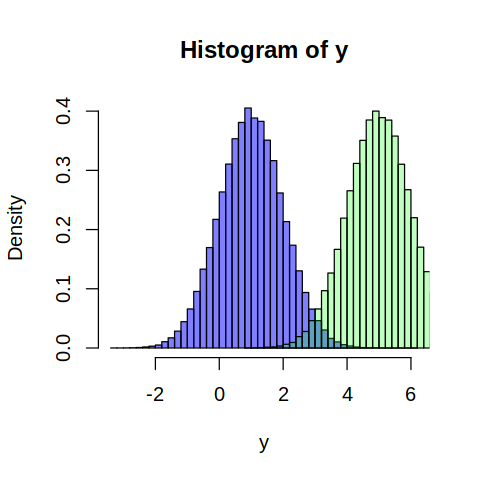

In [4]:
y <-rnorm(N,1,1)
# Now we want to generate more numbers in the 5-sigma
w <- dnorm(y,0,1)/dnorm(y,5,1)

# Also: sum(ifelse(y>1,w,0))
a <- c(sum(w[y>1])/N, sum(w[y>2])/N, sum(w[y>3])/N ,sum(w[y>4])/N ,sum(w[y>5])/N)
b <- pnorm(c(1,2,3,4,5),0,1,lower.tail=FALSE)
cat("Simulated:",a,"\n")
cat("Real:",b,"\n")
cat("Relative error",abs(a-b),"\n")
# Very poor results in the lower sigmas because we are biasing the sample to
# have more numbers in the upper tail.
hist(y,breaks=50,freq=FALSE,col=rgb(0,0,1,1/2))
hist(rnorm(N,5,1), add=TRUE,breaks=50,freq=FALSE,col=rgb(0,1,0,1/4))

## Get a random number according to a double gaussian using the Metropolis algorithm.

### 1D Gaussian

In [5]:
metro1 <- function(a,N,Niter,fun){
    
    # 1. Generate a sample of random walkers
    r <- runif(N,-2,2)
    uni <- r
    
    for (i in 1:Niter){
        # 2. Calculate the random walk
        delta <- runif(N,-a,a)
        # 3. Evaluate q
        q <- fun(r+delta)/fun(r)
        # 4. Accept/reject rn with prob q
        t <- runif(N,0,1)
        r <- ifelse(t<q,r+delta,r)
        # 5. Keep iterating
        }
    return(r)
}

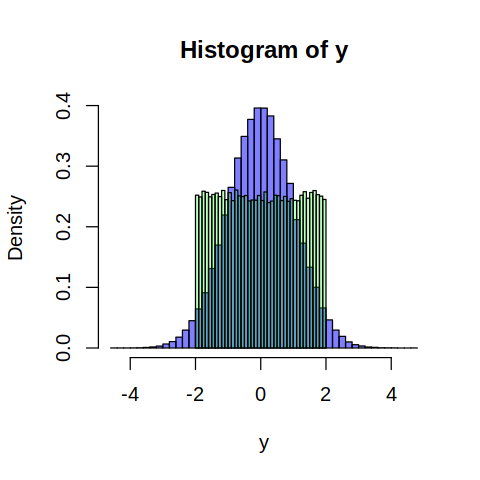

In [6]:
# metro(a, N, Niter, fun)
y <- metro1(0.1,1e5,1000,dnorm)
hist(y,breaks=50,freq=FALSE,col=rgb(0,0,1,1/2))
uni <- runif(1e5,-2,2)
hist(uni, add=TRUE,breaks=50,freq=FALSE,col=rgb(0,1,0,1/4))

### Exponential

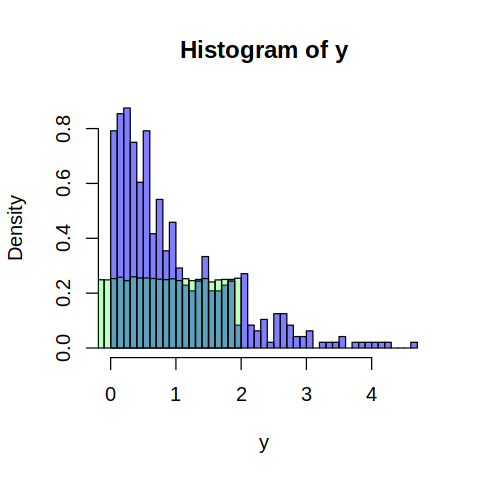

In [6]:
y <- metro1(0.1,1e3,1000,dexp)
hist(y,breaks=50,freq=FALSE,col=rgb(0,0,1,1/2))
uni <- runif(1e5,-2,2)
hist(uni, add=TRUE,breaks=50,freq=FALSE,col=rgb(0,1,0,1/4))

## 2D Gaussian

In [7]:
metro2 <- function(a,N,Niter,fun){
    
    # 1. Generate a sample of random walkers
    r <- cbind(runif(N,-2,2),runif(N,-2,2))
    uni <- r
    
    for (i in 1:Niter){
        # 2. Calculate the random walk
        delta <- cbind(runif(N,-a,a),runif(N,-a,a))
        # 3. Evaluate q
        q <- fun(r+delta)/fun(r)
        # 4. Accept/reject rn with prob q
        t <- runif(N,0,1)
        r <- ifelse(t<q,r+delta,r)
        # 5. Keep iterating
        }
    return(r)
}

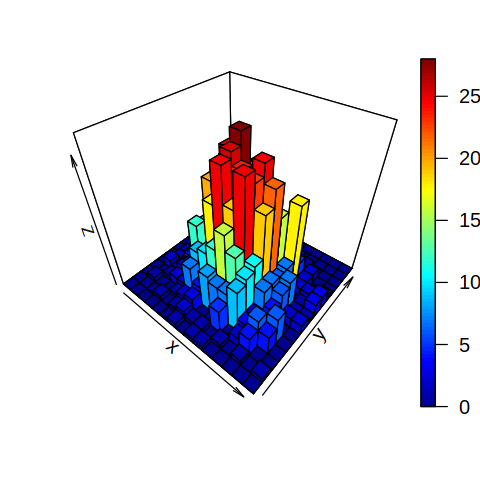

In [18]:
library(plot3D)

y <- metro2(0.1,1e3,1000,dnorm)

##  Create cuts:
x_c <- cut(y[,1], 15)
y_c <- cut(y[,2], 15)

##  Calculate joint counts at cut levels:
z <- table(x_c, y_c)

##  Plot as a 3D histogram:
hist3D(z=z, border="black")

## Getting a random position for hard-spheres in a square box.

In [50]:
metroBox <- function(a,N,Niter,L,R){
    
    mea <- c()
    
    # 1. Generate a sample of random walkers
    
    r <- cbind(runif(N,R,(L-R)/2),runif(N,R,(L-R)/2),runif(N,(L-R)/2,(L-R)),runif(N,(L-R)/2,L-R))
    
    for (i in 1:Niter){
        # 2. Calculate the random walk
        delta <- cbind(runif(N,-a,a),runif(N,-a,a),runif(N,-a,a),runif(N,-a,a))
        
        # 3 & 4. Evaluate q and accept/reject rn with prob q
        q <- rep(1,N)
        t <- runif(N,0,1)
        
        rini <- r
        r <- r + delta
        
        q <- ifelse( sqrt( (r[,1]-r[,3])**2 + (r[,2]-r[,4]) **2) < 2*rep(R,N), rep(0,N), q)
        
        q <- ifelse( r[,1] < R, rep(0,N), q)
        q <- ifelse( r[,1] > L-R, rep(0,N), q)
        
        q <- ifelse( r[,2] < R, rep(0,N), q)
        q <- ifelse( r[,2] > L-R, rep(0,N), q)
        
        q <- ifelse( r[,3] < R, rep(0,N), q)
        q <- ifelse( r[,3] > L-R, rep(0,N), q)
        
        q <- ifelse( r[,4] < R, rep(0,N), q)
        q <- ifelse( r[,4] >L-R, rep(0,N), q)
        
        # r <- ifelse(cbind(t,t,t,t)<cbind(q,q,q,q),r,rini)
        r <- ifelse(cbind(t,t,t,t)<cbind(q,q,q,q),r,rini)
        
        mea <- c(mea, mean(sqrt( (r[,1]-r[,3])**2 + (r[,2]-r[,4]) **2)))
        
        # 5. Keep iterating
        }
    
    plot(mea,pch=20)
    cat("Mean of the mean distance: ",mean(mea),"\n")
    cat("Standard deviation of the mean distance: ",sd(mea))
    return(r)
}

Mean of the mean distance:  4.711175 
Standard deviation of the mean distance:  0.2514673

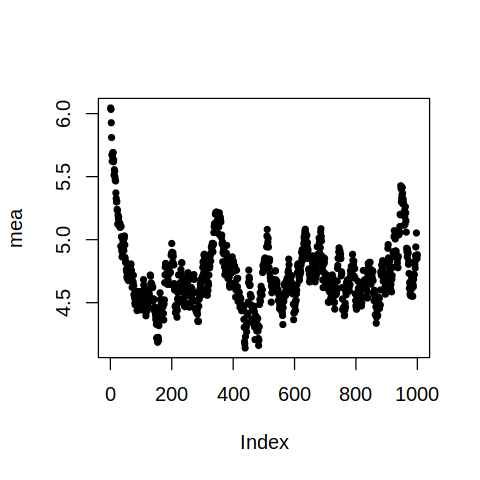

In [53]:
y <- metroBox(1,100,1000,10,1)

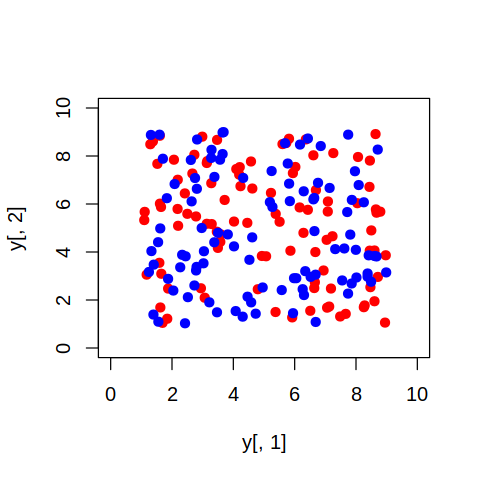

In [54]:
plot(y[,1],y[,2],col="red",xlim = c(0, 10),ylim = c(0, 10),pch=19)
points(y[,3],y[,4],col= "blue",pch=19)

### Still to do: programming the same case in a circular box of radius L.

In [84]:
metroCircle <- function(a,N,Niter,L,R){
    
    mea <- c()
    
    # 1. Generate a sample of random walkers
    
    r <- cbind(runif(N,-1/sqrt(2)*L,1/sqrt(2)*L),runif(N,-1/sqrt(2)*L,1/sqrt(2)*L),runif(N,-1/sqrt(2)*L,1/sqrt(2)*L),runif(N,-1/sqrt(2)*L,1/sqrt(2)*L))
    
    for (i in 1:Niter){
        # 2. Calculate the random walk
        delta <- cbind(runif(N,-a,a),runif(N,-a,a),runif(N,-a,a),runif(N,-a,a))
        
        # 3 & 4. Evaluate q and accept/reject rn with prob q
        q <- rep(1,N)
        t <- runif(N,0,1)
        
        rini <- r
        r <- r + delta
        
        q <- ifelse( sqrt( (r[,1]-r[,3])**2 + (r[,2]-r[,4]) **2) < 2*rep(R,N), rep(0,N), q)
        
        q <- ifelse( sqrt( (r[,1])**2 + (r[,2]) **2) < rep(L-R,N), rep(0,N), q)
        
        q <- ifelse( sqrt( (r[,3])**2 + (r[,4]) **2) < rep(L-R,N), rep(0,N), q)
        
        # r <- ifelse(cbind(t,t,t,t)<cbind(q,q,q,q),r,rini)
        r <- ifelse(cbind(t,t,t,t)<cbind(q,q,q,q),r,rini)
        
        mea <- c(mea, mean(sqrt( (r[,1]-r[,3])**2 + (r[,2]-r[,4]) **2)))
        
        # 5. Keep iterating
        }
    
    plot(mea,pch=20)
    cat("Mean of the mean distance: ",mean(mea),"\n")
    cat("Standard deviation of the mean distance: ",sd(mea))
    return(r)
}

Mean of the mean distance:  8.867626 
Standard deviation of the mean distance:  1.028865

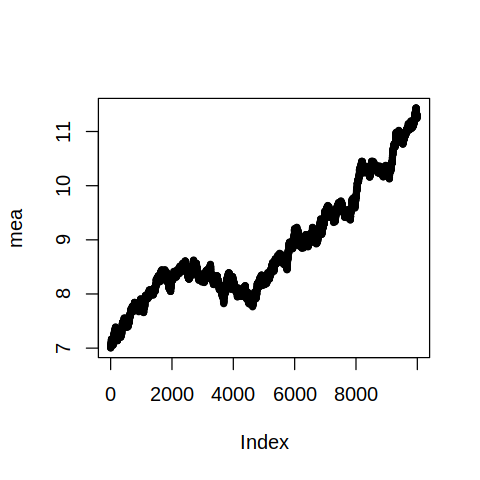

In [95]:
y <- metroCircle(1,100,10000,10,1)

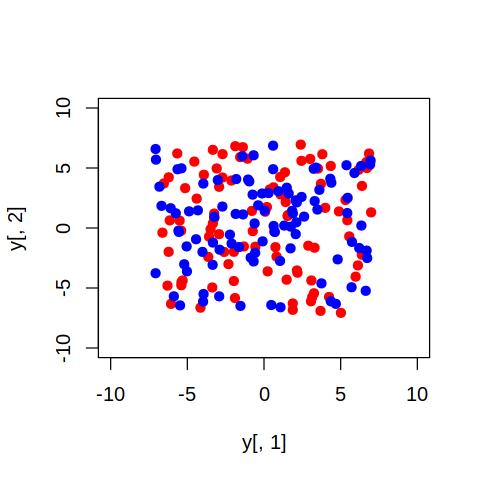

In [96]:
L <- 10
plot(y[,1],y[,2],col="red",xlim = c(-L, L),ylim = c(-L, L),pch=19)
points(y[,3],y[,4],col= "blue",pch=19)

## Bootstrap

### The classical one

In [97]:
library(boot)

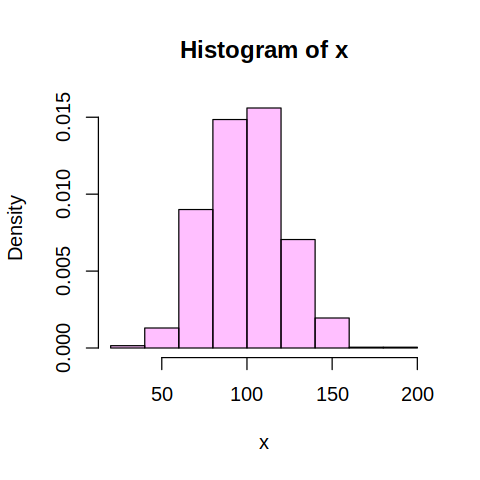

In [98]:
x<-read.table("galCounts.dat",header=F)
x <- x[,1]
len <- length(x)

options(repr.plot.width=4,repr.plot.height=4)
hist(x,freq=FALSE,col=rgb(1,0,1,1/4))

In [99]:
Niter <- 1000

am=mn=sm=numeric(len)

for (i in 1:Niter){
    a <- sample(x,len,replace= TRUE)
    
    sm[i] <- sd(a)
    am[i] <- median(a)
    mn[i] <- mean(a)
    }

16%      50%      84% 
21.71014 22.20756 22.64011

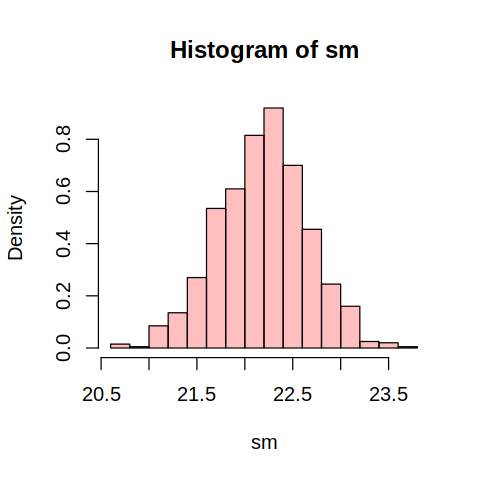

In [100]:
quantile(sm,prob=c(0.16,0.5,0.84))
hist(sm,freq=FALSE,col=rgb(1,0,0,1/4))

16% 50% 84% 
 99 100 101

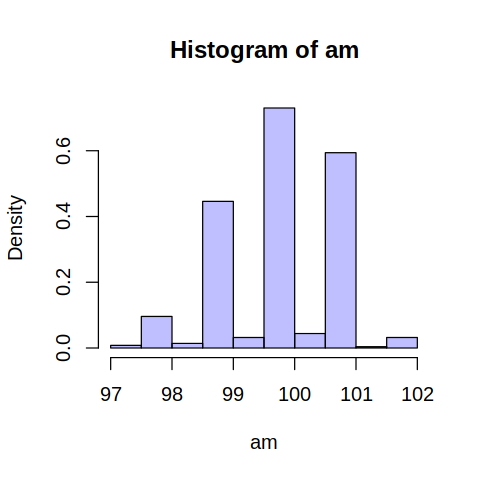

In [101]:
quantile(am,prob=c(0.16,0.5,0.84))
hist(am,freq=FALSE,col=rgb(0,0,1,1/4))

16%       50%       84% 
 99.56484 100.21750 100.96832

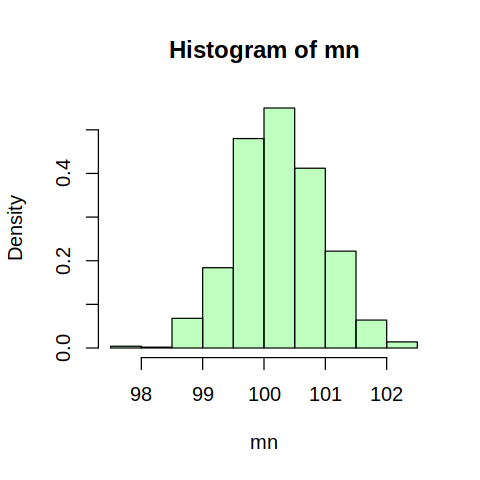

In [102]:
quantile(mn,prob=c(0.16,0.5,0.84))
hist(mn,freq=FALSE,col=rgb(0,1,0,1/4))

### Smoothed bootstrap (with poisson)
Next week work.

### Bootstrap to estimate the error of a fit
Next week work.